In [36]:
%matplotlib inline

import os
import json
import pandas as pd
import matplotlib.pyplot as plt

thts = True
stapu = True 

path_to_json = '/home/fatma/Data/PhD/code/prism_ws/prism-svn/prism/tests/results' 
#'/home/fatma/Data/PhD/code/prism_ws/prism-svn/prism/tests/autogen_testfiles/grid_3_topomap/'
json_ext = '.json'

#[u'All Reallocations Time', u'JointPolicyCreation',
#       u'Nested Product Time', u'NumReallocations', u'ReallocationStates',
#       u'Reallocations', u'Team MDP Time', u'Time', u'Total Time', u'doors',
#       u'nestedProductStates', u'nestedProductTimes', u'productCreation',
#       u'robots', u'tasks', u'teamMDPStates', u'teamMDPTransitions', u'trial']

df_dataTypes = {u'All Reallocations Time':'long', u'JointPolicyCreation':'dict',
       u'Nested Product Time':'long', u'NumReallocations':'int', u'ReallocationStates':'int',
       u'Reallocations':'dict', u'Team MDP Time':'long', u'Time':'datetime', u'Total Time':'long', u'doors':'int',
       u'nestedProductStates':'dict', u'nestedProductTimes':'dict', u'productCreation':'dict',
       u'robots':'int', u'tasks':'int', u'teamMDPStates':'int', u'teamMDPTransitions':'int', u'trial':'string',
                u'All Single Agent Solutions':'long',u'singleAgentSolutionTimes':'dict',
       u'singleAgentSolutions':'dict',u'fs':'int'}

def read_all_json_files(path_to_json,json_ext):
    stapu_data = []
    thts_data = []
    for path, subdirs, files in os.walk(path_to_json):
        for name in files:
            if name.endswith(json_ext):
                fullfn = os.path.join(path, name)
                if 'thts' not in name:
                    with open(fullfn) as json_file:
                        stapu_data.append(json.load(json_file))
                else:
                    with open(fullfn) as json_file:
                        thts_data.append(json.load(json_file))

    thts_df = pd.DataFrame(thts_data)
    stapu_df = pd.DataFrame(stapu_data)
    return [thts_df,stapu_df]

def remove_all_json_files(path_to_json,json_ext):
    
    for path, subdirs, files in os.walk(path_to_json):
        for name in files:
            if name.endswith(json_ext):
                fullfn = os.path.join(path, name)
                os.remove(fullfn)


def nsTos(x):
    return (x/1e9)

In [106]:
rtdfr = 0 
rtdft = 1 
rtdfd = 2 
rtdffs = 3 

    
def plot_values_totalTimeTask(rtdf):
    r = 0 
    t = 1 
    d = 2 
    fs = 3 
    x=t

    xlist =[[]]
    ylist = [[]]
    xlistc = 0
    tags = []
    xvalues = [] 
    prevs = None
    s = None

    for a in rtdf:
        prevs = s 
        s = a[0]
        v = a[1]
        if s[x] in xvalues:
            xvalues *=0 
            xlistc = xlistc +1 
            
            if x == r:
                tags.append({'fs':prevs[fs],'t':prevs[t],'d':prevs[d]})
            elif x== t:
                tags.append({'r':prevs[r]})
            elif x == d:
                tags.append({'fs':prevs[fs],'r':prevs[r],'t':prevs[t]})
            elif x == fs:
                tags.append({'r':prevs[r],'t':prevs[t],'d':prevs[d]})
            xlist.append([])
            ylist.append([])
            if xlistc > 0:
                plt.plot(xlist[xlistc-1],ylist[xlistc-1],label=str(tags[xlistc-1]),marker='x')
        
        #if xlistc > 4:
        #    break
        xvalues.append(s[x])
        xlist[xlistc].append(s[x])
        ylist[xlistc].append(v.values[0])
        
        #print s 
        #print v
    if x == r:
        tags.append({'fs':s[fs],'t':s[t],'d':s[d]})
    elif x== t:
        tags.append({'r':s[r]})
    elif x == d:
        tags.append({'fs':s[fs],'r':s[r],'t':s[t]})
    elif x == fs:
        tags.append({'r':s[r],'t':s[t],'d':s[d]})
    plt.plot(xlist[xlistc],ylist[xlistc],label=str(tags[xlistc]),marker='x')   
    plt.xlabel('Tasks')
    plt.ylabel('Time (s)')
    plt.legend(fontsize='small')
    

In [107]:
def plot_values_totalTimeRobot(rtdf):
    r = 0 
    t = 1 
    d = 2 
    fs = 3 
    x=r

    xbins = {}
    ybins = {}
    xlistc = 0
    tags = []
    xvalues = [] 
    prevs = None
    s = None

    for a in rtdf:
        prevs = s 
        s = a[0]
        v = a[1]
        #print s 
        #print v
        
        currentBin = (s[t],s[d],s[fs])
        if currentBin not in xbins:
            xbins[(s[t],s[d],s[fs])] = [s[x]]
            ybins[(s[t],s[d],s[fs])] = [v.values[0]]
        else:
            xbins[(s[t],s[d],s[fs])].append(s[x])
            ybins[(s[t],s[d],s[fs])].append(v.values[0])
    for b in xbins:
        lab = 't'+str(b[0])
        plt.plot(xbins[b],ybins[b],label=str(lab),marker='x')   
    #print xbins 
    #print ybins
    plt.xlabel('Robot')
    plt.ylabel('Time (s)')
    plt.legend(fontsize='small')
    
        #if xlistc > 4:
        #    break

In [108]:

#remove_all_json_files(path_to_json,json_ext)
[thts_df,stapu_df]=read_all_json_files(path_to_json,json_ext)

In [109]:
if thts:
    thts_df

In [110]:

def convertColumnToSeries(dfcolumn,columnname,df_dataTypes):
    dftype = df_dataTypes[columnname]
    #print dftype
    if dftype == 'int':
        converted = dfcolumn.astype(int)
    if dftype == 'long':
        converted = dfcolumn.astype(long)
        #convert from ms to ds
        converted=converted.apply(nsTos)
    if dftype == 'dict':
        #df['tests'].values.tolist(), index=df.index
        converted = pd.DataFrame(dfcolumn.values.tolist())
    if dftype == 'string':
        converted = dfcolumn.astype(str)
    if dftype == 'datetime':
        converted = pd.to_datetime(dfcolumn)
    return converted
def parseDataFrame(df,df_dataTypes):
    meh = {}
    for c in df.columns:
        dftype = df_dataTypes[c]
        if not dftype == 'datetime' and not dftype == 'dict':
            meh[c] = convertColumnToSeries(df[c],c,df_dataTypes)
    return pd.DataFrame(meh)


In [111]:
if stapu:
    df = stapu_df
    #print df.columns
    #print df.ndim
    #print df.size

    df = parseDataFrame(df,df_dataTypes)
    df = df.drop(df[df.doors > 5].index)
    stapu_df = df 

In [112]:
if thts:
    df = thts_df
    #print df.columns
    #print df.ndim
    #print df.size
    #df
    df = parseDataFrame(df,df_dataTypes)
    df = df.drop(df[df.doors > 5].index)
    thts_df = df 

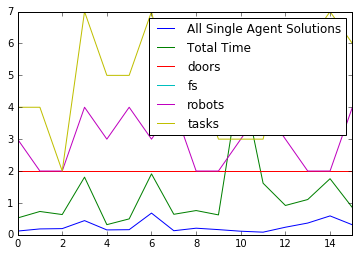

In [113]:
if thts:
    thts_df.plot()



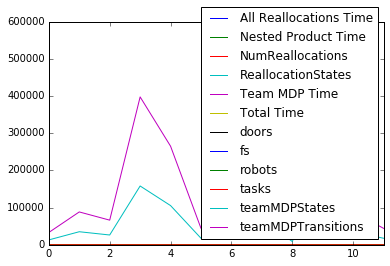

In [114]:
if stapu:
    stapu_df.plot()


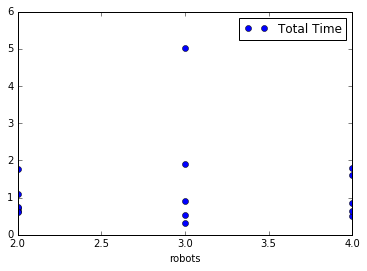

In [115]:
if thts:
    thts_df.plot(x=u'robots',y=u'Total Time',style='o')

    

In [116]:
thts_df

,All Single Agent Solutions,Total Time,doors,fs,robots,tasks,trial
0,0.116928,0.527507,2,7,3,4,grid_3_topomap_sim_doors
1,0.184283,0.731541,2,7,2,4,grid_3_topomap_sim_doors
2,0.193967,0.635308,2,7,2,2,grid_3_topomap_sim_doors
3,0.444841,1.808077,2,7,4,7,grid_3_topomap_sim_doors
4,0.153065,0.318291,2,7,3,5,grid_3_topomap_sim_doors
5,0.160533,0.498865,2,7,4,5,grid_3_topomap_sim_doors
6,0.680404,1.910597,2,7,3,7,grid_3_topomap_sim_doors
7,0.127918,0.643079,2,7,4,4,grid_3_topomap_sim_doors
8,0.207050,0.760585,2,7,2,5,grid_3_topomap_sim_doors
9,0.162561,0.624286,2,7,2,3,grid_3_topomap_sim_doors


In [117]:
stapu_df

,All Reallocations Time,Nested Product Time,NumReallocations,ReallocationStates,Team MDP Time,Total Time,doors,fs,robots,tasks,teamMDPStates,teamMDPTransitions,trial
0,0.659138,1.026099,2,0,1.065605,1.872388,2,7,3,3,13176,33128,grid_3_topomap_sim_doors
1,1.609146,15.900649,2,0,16.003411,17.855358,2,7,2,5,35136,88336,grid_3_topomap_sim_doors
2,2.345559,5.147839,7,0,5.225139,7.720984,2,7,3,4,26352,66256,grid_3_topomap_sim_doors
3,49.209953,327.044157,14,0,327.431121,376.795637,2,7,3,6,158112,397536,grid_3_topomap_sim_doors
4,7.424216,205.650207,2,0,206.417807,214.077968,2,7,2,6,105408,265008,grid_3_topomap_sim_doors
5,0.577161,3.066235,1,0,3.129466,3.916811,2,7,2,4,17568,44168,grid_3_topomap_sim_doors
6,7.665730,22.443375,11,0,22.800581,30.666058,2,7,3,5,52704,132512,grid_3_topomap_sim_doors
7,27.754697,29.709856,26,0,29.799802,57.704382,2,7,4,5,70272,176688,grid_3_topomap_sim_doors
8,0.177684,0.757255,0,0,0.806848,1.188415,2,7,2,3,8784,22084,grid_3_topomap_sim_doors
9,225.851880,435.125839,38,0,435.426358,661.479794,2,7,4,6,210816,530064,grid_3_topomap_sim_doors


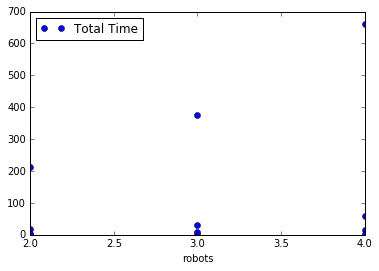

In [118]:
if stapu:
    stapu_df.plot(x=u'robots',y=u'Total Time',style='o')

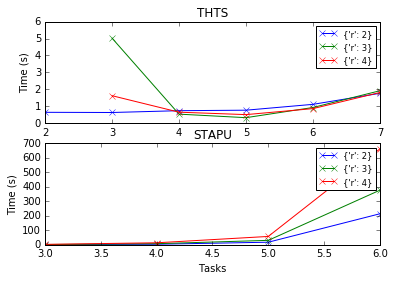

In [121]:
if thts:
    rtdf = thts_df.groupby([u'robots',u'tasks',u'doors',u'fs'])[u'Total Time']
    rtfd = thts_df.groupby([u'robots',u'tasks',u'fs',u'doors'])[u'Total Time']
    trdf = thts_df.groupby([u'tasks',u'robots',u'fs',u'doors'])[u'Total Time']
    trdf.describe()
    plt.subplot(211)
    plt.title('THTS')
    plot_values_totalTimeTask(rtdf)

if stapu:
    rtdf = stapu_df.groupby([u'robots',u'tasks',u'doors',u'fs'])[u'Total Time']
    rtfd = stapu_df.groupby([u'robots',u'tasks',u'fs',u'doors'])[u'Total Time']
    trdf = stapu_df.groupby([u'tasks',u'robots',u'fs',u'doors'])[u'Total Time']   
    trdf.describe()
    plt.subplot(212)
    plt.title('STAPU')
    plot_values_totalTimeTask(rtdf)

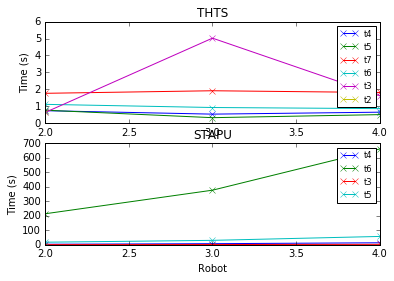

In [122]:
if thts:
    
    rtdf = thts_df.groupby([u'robots',u'tasks',u'doors',u'fs'])[u'Total Time']
    plt.subplot(211)
    plt.title('THTS')
    plot_values_totalTimeRobot(rtdf)
if thts:
    rtdf = stapu_df.groupby([u'robots',u'tasks',u'doors',u'fs'])[u'Total Time']
    plt.subplot(212)
    plt.title('STAPU')
    plot_values_totalTimeRobot(rtdf)

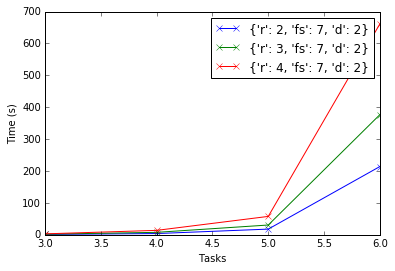

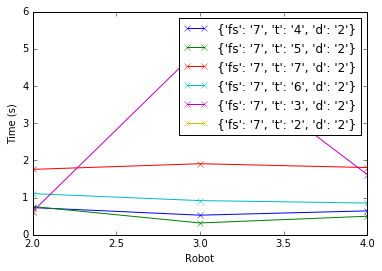